Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import json

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

In [3]:
# Set current amount of crypto assets
btc_balance = 1.2
eth_balance = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
#Data request for BTC

btc_response_data = requests.get(btc_url)
btc_data = btc_response_data.content
btc = btc_response_data.json()
print(json.dumps(btc, indent=4))

#Data request for ETH
eth_response_data = requests.get(eth_url)
eth_data = eth_response_data.content
eth = eth_response_data.json()
print(json.dumps(eth, indent=4))

{
    "data": {
        "1": {
            "id": 1,
            "name": "Bitcoin",
            "symbol": "BTC",
            "website_slug": "bitcoin",
            "rank": 1,
            "circulating_supply": 18996425,
            "total_supply": 18996425,
            "max_supply": 21000000,
            "quotes": {
                "USD": {
                    "price": 47303.0,
                    "volume_24h": 31733563396,
                    "market_cap": 899146415598,
                    "percentage_change_1h": -0.248810354890101,
                    "percentage_change_24h": 5.65288629412602,
                    "percentage_change_7d": 14.5820116557871,
                    "percent_change_1h": -0.248810354890101,
                    "percent_change_24h": 5.65288629412602,
                    "percent_change_7d": 14.5820116557871
                },
                "CAD": {
                    "price": 59346.3438,
                    "volume_24h": 39812928636.6216,
                    "

In [6]:
# Fetch current BTC price
btc_response_data = requests.get(btc_url).json()
btc_price = btc_response_data["data"]["1"]["quotes"]["CAD"]["price"]     

# Fetch current ETH price
eth_response_data = requests.get(eth_url).json()
eth_price = eth_response_data["data"]["1027"]["quotes"]["CAD"]["price"]

# Compute current value of my crypto
eth_value = eth_balance * eth_price
btc_value = btc_balance * btc_price

# Compute total value of my crypto
total_crypto = eth_value + btc_value

# Print current crypto wallet balance
print(f"The current value of your {btc_balance} BTC is ${btc_value:,.2f}")
print(f"The current value of your {eth_balance} ETH is ${eth_value:,.2f}")

The current value of your 1.2 BTC is $71,215.61
The current value of your 5.3 ETH is $22,256.01


Collect Investments Data Using Alpaca: SPY (stocks) and AGG (bonds)

In [7]:
# Current amount of shares
shares_agg = 200
shares_spy = 50

In [8]:
#Importing Alpaca
import alpaca_trade_api as trade_api

In [9]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")
# Create the Alpaca API object
api=tradeapi.REST(alpaca_api_key, alpaca_secret_key, api_version='v2')

In [10]:
# Format current date as ISO format
today = pd.Timestamp("2020-05-01", tz="America/New_York").isoformat()
# Set timeframe to '1D' for Alpaca API
from datetime import datetime
timeframe = "1Day"
# Set the tickers
tickers=['AGG', 'SPY']

In [11]:
from alpaca_trade_api.rest import REST, TimeFrame

In [12]:
# Get current closing prices for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
portfolios = api.get_bars( tickers, timeframe, start=today, limit=1000, adjustment='raw').df

In [13]:
#Drop symbol to divide the data per ticker
AGG = portfolios[portfolios["symbol"]=="AGG"].drop("symbol", axis=1)
SPY = portfolios[portfolios["symbol"]=="SPY"].drop("symbol", axis=1)

#Unifying the data in portfolios
portfolios = pd.concat([AGG, SPY], axis=1, keys=['AGG','SPY'])         

# Preview DataFrame
portfolios.head()

AGG                                       \
                             open      high       low   close   volume   
timestamp                                                                
2020-05-01 04:00:00+00:00  116.97  117.0998  116.6775  116.87  6099893   
2020-05-04 04:00:00+00:00  116.89  117.0900  116.8700  116.97  3684081   
2020-05-05 04:00:00+00:00  116.96  116.9700  116.8100  116.88  4612127   
2020-05-06 04:00:00+00:00  116.44  116.7100  116.3000  116.41  6394949   
2020-05-07 04:00:00+00:00  116.61  116.7700  116.4200  116.77  3788632   

                                                      SPY                      \
                          trade_count        vwap    open      high       low   
timestamp                                                                       
2020-05-01 04:00:00+00:00       24395  116.846123  285.16  290.6572  281.5200   
2020-05-04 04:00:00+00:00       15545  116.960599  280.46  283.9000  279.1300   
2020-05-05 04:00:00+00:00       15150  116.879635  286.66  289.2500  283.7134   
2020-05-06 04:00:00+00:00       20233  116.426742  288.01  288.4600  283.7800   
2020-05-07 04:00:00+00:00       15964  116.641830  287.79  289.7800  287.1300   

                                                                      
                            close     volume trade_count        vwap  
timestamp                                                             
2020-05-01 04:00:00+00:00  282.79  125180028      639987  284.092832  
2020-05-04 04:00:00+00:00  283.57   80883545      460682  281.765323  
2020-05-05 04:00:00+00:00  286.19   79569939      459764  287.400201  
2020-05-06 04:00:00+00:00  284.25   74234197      436223  286.083037  
2020-05-07 04:00:00+00:00  287.68   75250852      422689  287.989937

In [14]:
# Pick AGG and SPY close prices
agg_close_price = portfolios["AGG"]["close"].values[0]
spy_close_price = portfolios["SPY"]["close"].values[0]
# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $116.87
Current SPY closing price: $282.79


In [15]:
# Compute the current value of shares
my_agg_value = shares_agg * agg_close_price 
my_spy_value = shares_spy * spy_close_price
total_stocks = my_agg_value + my_spy_value
# Print current value of share
print(f"The current value of your {shares_agg} SPY shares is ${my_spy_value:,.2f}")
print(f"The current value of your {shares_spy} AGG shares is ${my_agg_value:,.2f}")

The current value of your 200 SPY shares is $14,139.50
The current value of your 50 AGG shares is $23,374.00


Savings Health Analysis

In [16]:
# Set monthly household income
income = 12000

# Consolidate financial assets data
total_amount = {'amount': [btc_value + eth_value, my_spy_value + my_agg_value]}

# Create savings DataFrame
savings = pd.DataFrame(total_amount, index= ["crypto", "shares"])

# Display savings DataFrame
display(savings)

,amount
crypto,93471.61937
shares,37513.50000


<AxesSubplot:title={'center':'Composition of Personal Savings'}, ylabel='amount'>

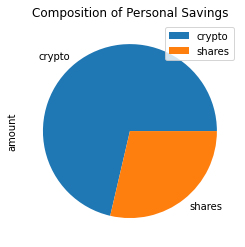

In [17]:
# Plot savings pie chart
savings.plot.pie(y="amount", title="Composition of Personal Savings")

In [18]:
# Set ideal emergency fund
emergency_fund = income * 3
# Calculate total amount of savings
total_savings = total_crypto + total_stocks
# Validate saving health
if emergency_fund < total_savings:
        print("Congratuations! You have enough money in your emergency fund.")
elif emergency_fund == total_savings:
        print("Congratulations! You have reach this financial goal")
else:
        print(f"You are {emergency_fund - total_savings} dollars away from reaching the goal")

Congratuations! You have enough money in your emergency fund.


Part 2 - Retirement Planning
Monte Carlo Simulation

In [19]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()
#Defining tickers
tickers = ["AGG","SPY"]

In [20]:
# Get 5 years' worth of historical data for SPY and AGG
stocks = api.get_bars(tickers, timeframe, start=start_date).df
# Drop the time component of the date
stocks.index = stocks.index.date
# Display sample data
stocks

#Rearranging the data fame to separate ticker data
AGG = stocks[stocks["symbol"]=="AGG"].drop("symbol", axis=1)
SPY = stocks[stocks["symbol"]=="SPY"].drop("symbol", axis=1)
#Concat the re-arranged dfs
stocks = pd.concat([AGG, SPY], axis=1, keys=["AGG","SPY"])         

# Display sample data
display(stocks)

AGG                                                    \
              open      high       low   close    volume trade_count   
2016-05-02  110.74  110.7400  110.5200  110.61   3553939       15119   
2016-05-03  110.89  110.9450  110.7500  110.81   3044940       15662   
2016-05-04  110.91  110.9315  110.7595  110.86   2920608       13982   
2016-05-05  110.92  111.1600  110.8010  111.14   3008142       15707   
2016-05-06  111.12  111.1200  110.9700  110.97   2718710       12697   
...            ...       ...       ...     ...       ...         ...   
2022-03-22  106.74  106.8800  106.6100  106.75  16048681       51796   
2022-03-23  106.96  107.2100  106.7105  107.19   8567200       27348   
2022-03-24  106.72  107.0350  106.6500  106.95   7378690       23320   
2022-03-25  106.65  106.6500  105.9750  106.10  10295813       37569   
2022-03-28  106.25  106.5252  106.1600  106.25   4199108       15371   

                           SPY                                      \
                  vwap    open     high     low   close     volume   
2016-05-02  110.627199  206.90  208.180  206.41  208.03   61908515   
2016-05-03  110.865995  206.50  206.800  205.28  206.13  106422142   
2016-05-04  110.879063  205.00  205.850  204.42  204.96   92199810   
2016-05-05  111.028363  205.57  205.980  204.47  204.95   67597222   
2016-05-06  111.031967  204.04  205.770  203.88  205.70   89131004   
...                ...     ...      ...     ...     ...        ...   
2022-03-22  106.746967  445.99  450.580  445.86  449.59   73674202   
2022-03-23  106.991875  446.90  448.490  443.71  443.80   77982935   
2022-03-24  106.879605  445.82  450.500  444.76  450.48   61411569   
2022-03-25  106.190724  451.09  452.980  448.43  452.69   77199328   
2022-03-28  106.311263  452.04  453.649  450.06  451.98   33582566   

                                    
           trade_count        vwap  
2016-05-02      263580  207.294812  
2016-05-03      377518  206.312060  
2016-05-04      345261  205.090172  
2016-05-05      280622  205.141555  
2016-05-06      340335  204.937074  
...                ...         ...  
2022-03-22      623610  448.558595  
2022-03-23      627281  446.058683  
2022-03-24      526865  447.609014  
2022-03-25      661033  451.047221  
2022-03-28      392926  452.078543  

[1488 rows x 14 columns]

In [21]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
Monte_Carlo_30Years = MCSimulation(
    portfolio_data = stocks,
    weights = [.4,.6],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [22]:
Monte_Carlo_30Years.portfolio_data.head()

AGG                                                   \
              open      high       low   close   volume trade_count   
2016-05-02  110.74  110.7400  110.5200  110.61  3553939       15119   
2016-05-03  110.89  110.9450  110.7500  110.81  3044940       15662   
2016-05-04  110.91  110.9315  110.7595  110.86  2920608       13982   
2016-05-05  110.92  111.1600  110.8010  111.14  3008142       15707   
2016-05-06  111.12  111.1200  110.9700  110.97  2718710       12697   

                                        SPY                          \
                  vwap daily_return    open    high     low   close   
2016-05-02  110.627199          NaN  206.90  208.18  206.41  208.03   
2016-05-03  110.865995     0.001808  206.50  206.80  205.28  206.13   
2016-05-04  110.879063     0.000451  205.00  205.85  204.42  204.96   
2016-05-05  111.028363     0.002526  205.57  205.98  204.47  204.95   
2016-05-06  111.031967    -0.001530  204.04  205.77  203.88  205.70   

                                                            
               volume trade_count        vwap daily_return  
2016-05-02   61908515      263580  207.294812          NaN  
2016-05-03  106422142      377518  206.312060    -0.009133  
2016-05-04   92199810      345261  205.090172    -0.005676  
2016-05-05   67597222      280622  205.141555    -0.000049  
2016-05-06   89131004      340335  204.937074     0.003659

In [23]:
#Import for ignore warnings
import warnings
warnings.filterwarnings("ignore")                       

In [24]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
Monte_Carlo_30Years.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.997756,0.999840,0.993596,1.003232,0.994702,1.002147,0.996534,0.996573,1.003595,0.989067,...,1.000564,0.997440,0.994066,0.997591,1.011192,1.007606,1.006492,0.995689,0.997569,0.999737
2,1.001607,1.004872,0.996314,1.004752,1.005250,0.992096,0.995901,1.012883,1.002433,0.982523,...,1.016432,0.989308,0.992374,1.000993,1.022501,1.003252,1.009172,0.998469,0.995517,0.991727
3,1.004141,1.004608,0.995800,0.995526,1.004808,0.990546,1.012514,1.013657,0.991399,0.992747,...,1.017364,0.985460,1.009881,1.010597,1.026835,0.998260,1.007319,1.000532,0.978274,0.985889
4,1.014850,1.009094,1.003174,1.004938,1.011692,0.996477,0.995954,1.020211,0.995405,1.003552,...,1.021922,0.979153,1.025873,1.013246,1.031249,0.996339,1.007325,0.999355,0.963703,0.992632
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,3.066568,16.541380,7.574988,4.640939,8.001268,1.456274,17.612497,4.145063,10.259655,7.780696,...,9.093069,1.720717,2.592646,10.795732,3.987892,2.623850,6.786716,21.139624,12.620053,5.813828
7557,3.048977,16.355300,7.578883,4.651443,8.010778,1.455665,17.634126,4.187622,10.379775,7.858681,...,9.132034,1.714363,2.588933,10.721671,3.972441,2.623943,6.771699,21.244914,12.468258,5.864049
7558,3.056280,16.127295,7.689591,4.611452,8.087177,1.470831,17.688337,4.173471,10.337643,7.804375,...,9.026427,1.728138,2.576618,10.769362,3.975279,2.622777,6.694546,21.212582,12.540074,5.828680
7559,3.080193,16.204613,7.594423,4.604835,8.115042,1.465600,17.517159,4.151878,10.362169,7.809998,...,8.932265,1.733120,2.578499,10.844299,3.968329,2.620023,6.663737,21.049096,12.654161,5.783562


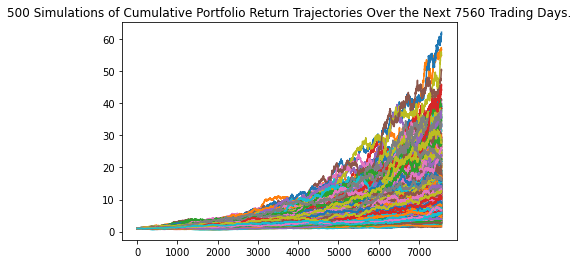

In [25]:
# Plot simulation outcomes
plot = Monte_Carlo_30Years.plot_simulation()

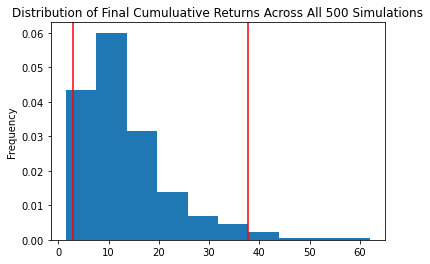

In [26]:
# Plot probability distribution and confidence intervals
dist_plot = Monte_Carlo_30Years.plot_distribution()

Retirement Analysis

In [27]:
# Fetch summary statistics from the Monte Carlo simulation results
summary_stats_30 = Monte_Carlo_30Years.summarize_cumulative_return()

# Print summary statistics
print(summary_stats_30)

count           500.000000
mean             13.439589
std               9.113800
min               1.478774
25%               7.269799
50%              10.849314
75%              16.830806
max              62.072462
95% CI Lower      2.885239
95% CI Upper     37.771222
Name: 7560, dtype: float64


 Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a $20,000 initial investment.

In [28]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(summary_stats_30[8] * initial_investment, 2)
ci_upper = round(summary_stats_30[9] * initial_investment, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment:,.02f} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower:,.02f} and ${ci_upper:,.02f}")

There is a 95% chance that an initial investment of $20,000.00 in the portfolio over the next 30 years will end within in the range of $57,704.78 and $755,424.44


Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a 50% increase in the initial investment.

In [29]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(summary_stats_30[8] * initial_investment, 2)
ci_upper = round(summary_stats_30[9] * initial_investment, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment:,.02f} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower:,.02f} and ${ci_upper:,.02f}")

There is a 95% chance that an initial investment of $30,000.00 in the portfolio over the next 30 years will end within in the range of $86,557.16 and $1,133,136.67


Optional Challenge - Early Retirement
Five Years Retirement Option

In [30]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
Monte_Carlo_5Year = MCSimulation(
    portfolio_data = stocks,
    weights = [.4,.6],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [31]:
Monte_Carlo_5Year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.005516,1.005942,0.994190,1.007037,1.007542,1.008283,1.002990,0.992464,0.997761,1.001693,...,1.002982,1.000288,1.001243,1.004404,1.002474,1.000106,0.999999,0.999167,0.993569,1.001480
2,1.007278,0.994386,1.001972,0.988442,1.026099,1.004524,1.003228,1.002504,0.996142,0.991491,...,1.005434,1.006365,0.999448,1.004164,0.993034,1.002220,1.001866,1.005986,0.999153,1.011257
3,1.000619,0.992206,0.996455,0.985377,1.025073,1.000992,1.002253,1.000322,0.997337,0.986780,...,0.992633,1.015496,1.007843,1.012187,0.992736,0.996444,0.991868,1.009242,0.989933,1.012830
4,1.003523,0.998269,1.000343,0.983063,1.020895,1.003724,0.998661,0.983777,0.998760,0.982882,...,1.000055,1.020062,1.012451,1.009372,0.977801,0.998149,0.996075,1.016154,0.990790,1.017593
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.409601,1.737835,1.088634,1.455258,1.335418,0.907337,1.599993,1.183515,1.190319,2.050782,...,1.829553,1.221826,1.043054,1.235271,0.785581,1.540802,2.150551,1.242198,1.797573,1.293413
1257,1.419333,1.732524,1.088652,1.446170,1.346010,0.904813,1.609872,1.187614,1.188425,2.050211,...,1.823927,1.209361,1.038640,1.246249,0.772057,1.538684,2.155696,1.230606,1.798468,1.298327
1258,1.418416,1.735439,1.088984,1.443590,1.369857,0.906744,1.616286,1.175120,1.190774,2.062105,...,1.819958,1.206003,1.038835,1.232794,0.777112,1.551351,2.151778,1.225206,1.801324,1.307763
1259,1.427003,1.732353,1.094813,1.426822,1.359706,0.898752,1.612725,1.179080,1.194585,2.082146,...,1.810469,1.211941,1.028817,1.243212,0.789957,1.537992,2.148975,1.221568,1.823570,1.325649


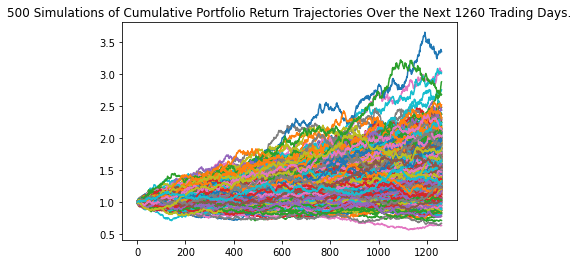

In [32]:
five_year_plot = Monte_Carlo_5Year.plot_simulation()

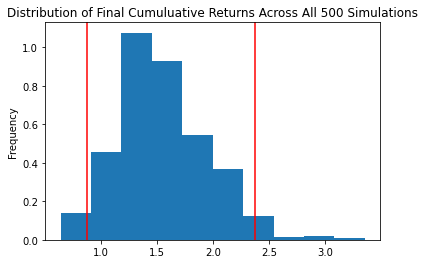

In [33]:
five_year_dist = Monte_Carlo_5Year.plot_distribution()

In [34]:
# Fetch summary statistics from the Monte Carlo simulation results
summary_stats_5 = Monte_Carlo_5Year.summarize_cumulative_return()

# Print summary statistics
print(summary_stats_5)

count           500.000000
mean              1.547587
std               0.404948
min               0.638083
25%               1.261587
50%               1.499826
75%               1.800852
max               3.353083
95% CI Lower      0.872061
95% CI Upper      2.374287
Name: 1260, dtype: float64


In [35]:
# Set initial investment
initial_inv_five = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(summary_stats_5[8] * initial_inv_five, 2)
ci_upper_five = round(summary_stats_5[9] * initial_inv_five, 2)


# Print results
print(f"There is a 95% chance that an initial investment of ${initial_inv_five:,.02f} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five:,.02f} and ${ci_upper_five:,.02f}")

There is a 95% chance that an initial investment of $60,000.00 in the portfolio over the next 5 years will end within in the range of $52,323.68 and $142,457.25


Ten Years Retirement Option

In [36]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# Stock ratio 80% and bond ration = 20%
Monte_Carlo_10Year = MCSimulation(
    portfolio_data = stocks,
    weights = [.2,.8],
    num_simulation = 500,
    num_trading_days = 252*10
)

In [37]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
Monte_Carlo_10Year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.993335,0.987354,0.997703,0.992258,0.998698,1.013700,0.989391,1.000314,1.013963,1.004677,...,1.011367,0.984679,0.995068,1.000360,1.001349,1.010006,0.983688,1.012971,1.025039,0.994570
2,0.992361,0.985372,1.000188,0.980991,1.007753,1.021495,0.981401,1.009207,1.011609,1.011425,...,1.016986,0.998576,0.987462,1.002667,1.000797,1.015692,0.997299,1.014539,1.045232,0.997005
3,0.968944,0.981322,0.991918,0.998183,1.012273,1.009440,0.979245,0.996148,0.999349,1.034055,...,1.001508,0.989245,1.001142,1.001846,0.998744,1.024875,1.012615,0.998508,1.051539,0.997552
4,0.975500,0.971000,0.983513,0.987014,0.995007,1.013492,0.983526,0.990937,0.992811,1.040978,...,1.013927,0.987252,0.996766,1.006935,1.002309,1.007166,1.002330,1.014564,1.039421,1.018096
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,5.612972,3.595264,3.110524,1.184182,1.981071,5.220953,3.431486,6.218398,1.392557,2.764862,...,1.271455,2.047184,3.942975,2.520221,2.709783,1.916556,3.229907,2.981448,4.190953,1.813924
2517,5.603034,3.589914,3.112858,1.188337,1.967445,5.316346,3.447574,6.247495,1.383657,2.760580,...,1.285680,2.047418,3.936807,2.502345,2.725036,1.927169,3.246649,2.983946,4.213302,1.809084
2518,5.740868,3.581014,3.122766,1.180833,1.945341,5.318115,3.466751,6.270491,1.392951,2.764270,...,1.297887,2.064955,3.955154,2.476732,2.684667,1.887887,3.295465,2.992881,4.191142,1.812446
2519,5.733198,3.553642,3.134456,1.176085,1.969289,5.376255,3.457933,6.127618,1.373524,2.790470,...,1.308198,2.070980,3.970095,2.440049,2.676883,1.869936,3.233227,3.022099,4.217244,1.790159


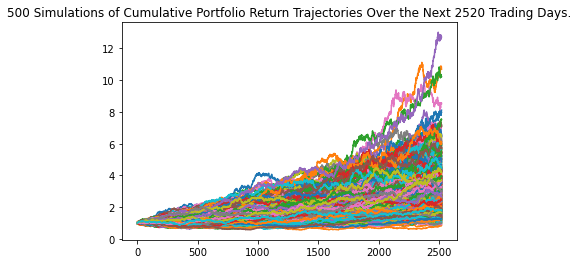

In [38]:
# Plot simulation outcomes
plot_10years = Monte_Carlo_10Year.plot_simulation()

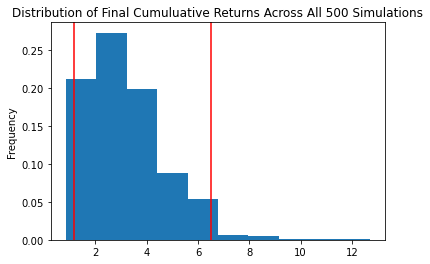

In [39]:
# Plot probability distribution and confidence intervals
dist_10years = Monte_Carlo_10Year.plot_distribution()

In [40]:
# Fetch summary statistics from the Monte Carlo simulation results
summary_stats_10 = Monte_Carlo_10Year.summarize_cumulative_return()

# Print summary statistics
print(summary_stats_10)

count           500.000000
mean              3.180862
std               1.574484
min               0.841442
25%               2.027625
50%               2.909518
75%               3.916563
max              12.714308
95% CI Lower      1.179671
95% CI Upper      6.488493
Name: 2520, dtype: float64


In [41]:
# Set initial investment
init_inv_ten = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(summary_stats_10[8] * init_inv_ten, 2)
ci_upper_ten = round(summary_stats_10[9] * init_inv_ten, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${init_inv_ten:,.02f} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten:,.02f} and ${ci_upper_ten:,.02f}")

There is a 95% chance that an initial investment of $60,000.00 in the portfolio over the next 10 years will end within in the range of $70,780.27 and $389,309.55
